# Import Libraries

In [30]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# logistic regression model
import statsmodels.api as sm 

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.0f}'.format

# Define Functions

# Import Dataset

In [31]:
df = pd.read_csv('modified/week5_df.csv')

In [32]:
df.head(5)

,annual_revenue,Month_on_Book,Branch_Trans_3_Mos,ATM_Trans_3_Mos,signon_trans_3_Mos,CC_Visits_3_Mos,VRU_visits_3_Mos,BP_trans_3_Mos,RDC_trans_3_Mos,Active_user,Checking_flag,Savings_flag,Loans_LOC_flag,CreditCard_flag,CDs_flag,HELoans_HELOC_flag,MMDA_flag,Customer_Value,Number_of_Children,Family_composition,Gender_P1,marital_status_P1,Dwelling_Type,Number_of_Adults,Length_of_Residence,Household_Age,HH_EDUCATION_VALUE,HH_INCOME2,Occupation,Liquid_Resources,Auto_Refinance,Credit_Card,Home_Equity_ITA,Click,Open,DV,Has_kids,Multi_Adult
0,17,366,1,8,19,0,0,3,0,1,1,0,0,0,0,0,0,737,0,8,1,Married,SingleFamily,2,7,7,4,6,14,8,0,0,0,1,1,1,0,1
1,6400,350,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,300000,0,8,1,Married,SingleFamily,2,8,6,2,3,13,3,0,0,0,0,0,1,0,1
2,1127,299,2,10,28,0,0,0,0,1,1,1,0,1,0,0,0,41623,0,14,1,Single,SingleFamily,2,8,5,2,6,14,5,0,0,0,0,0,1,0,1
3,1247,317,4,37,20,0,2,0,0,1,1,0,0,1,0,0,0,8163,0,6,0,Single,SingleFamily,2,8,4,3,2,0,1,0,0,0,0,0,1,0,1
4,33,272,0,2,21,0,0,0,0,2,1,0,0,0,0,0,0,1187,0,14,1,Single,Condo,1,4,2,4,4,0,7,0,1,0,0,1,1,0,0


In [33]:
df.columns

Index(['annual_revenue', 'Month_on_Book', 'Branch_Trans_3_Mos', 'ATM_Trans_3_Mos', 'signon_trans_3_Mos', 'CC_Visits_3_Mos', 'VRU_visits_3_Mos', 'BP_trans_3_Mos', 'RDC_trans_3_Mos', 'Active_user', 'Checking_flag', 'Savings_flag', 'Loans_LOC_flag', 'CreditCard_flag', 'CDs_flag', 'HELoans_HELOC_flag', 'MMDA_flag', 'Customer_Value', 'Number_of_Children', 'Family_composition', 'Gender_P1', 'marital_status_P1', 'Dwelling_Type', 'Number_of_Adults', 'Length_of_Residence', 'Household_Age', 'HH_EDUCATION_VALUE', 'HH_INCOME2', 'Occupation', 'Liquid_Resources', 'Auto_Refinance', 'Credit_Card', 'Home_Equity_ITA', 'Click', 'Open', 'DV', 'Has_kids', 'Multi_Adult'], dtype='object')

In [34]:
# # Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
# def high_corr_and_check(X):
#     corr_matrix = X.corr().abs()
#     sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
#                                      k=1).astype(np.bool))
#                       .stack()
#                       .sort_values(ascending=False))
#     for index, value in sol.items():
#         if value > 0.69:
#             print(index,value)
            
# high_corr_and_check(df)

<b>Comment: </b>I am removing a columns from the 3rd party dataset, but will circle back to think about using them for a more robust modelled output with better results.

In [35]:
df.drop(columns=['Number_of_Children',
                 'Liquid_Resources', 
                 'Number_of_Adults',
                 'Family_composition',
                 'Occupation', 
                 'Length_of_Residence',
                 'Household_Age',
                 'HH_EDUCATION_VALUE',
                 'HH_INCOME2', 
                 'marital_status_P1', 
                 'Dwelling_Type', 
                 'Active_user', 
                 'Has_kids', 
                 'Multi_Adult'],
        inplace=True)

In [36]:
# df1 = pd.get_dummies(df, columns = ['marital_status_P1'])
# df1 = pd.get_dummies(df1, columns = ['Dwelling_Type'])
# df1 = pd.get_dummies(df1, columns = ['Active_user'])

In [37]:
# a = df1.select_dtypes(include=['int64', 'uint8']).columns
# df1[a] = df1[a].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Data columns (total 24 columns):
annual_revenue        4753 non-null int64
Month_on_Book         4753 non-null int64
Branch_Trans_3_Mos    4753 non-null int64
ATM_Trans_3_Mos       4753 non-null int64
signon_trans_3_Mos    4753 non-null int64
CC_Visits_3_Mos       4753 non-null int64
VRU_visits_3_Mos      4753 non-null int64
BP_trans_3_Mos        4753 non-null int64
RDC_trans_3_Mos       4753 non-null int64
Checking_flag         4753 non-null int64
Savings_flag          4753 non-null int64
Loans_LOC_flag        4753 non-null int64
CreditCard_flag       4753 non-null int64
CDs_flag              4753 non-null int64
HELoans_HELOC_flag    4753 non-null int64
MMDA_flag             4753 non-null int64
Customer_Value        4753 non-null float64
Gender_P1             4753 non-null int64
Auto_Refinance        4753 non-null int64
Credit_Card           4753 non-null int64
Home_Equity_ITA       4753 non-null int64
Click    

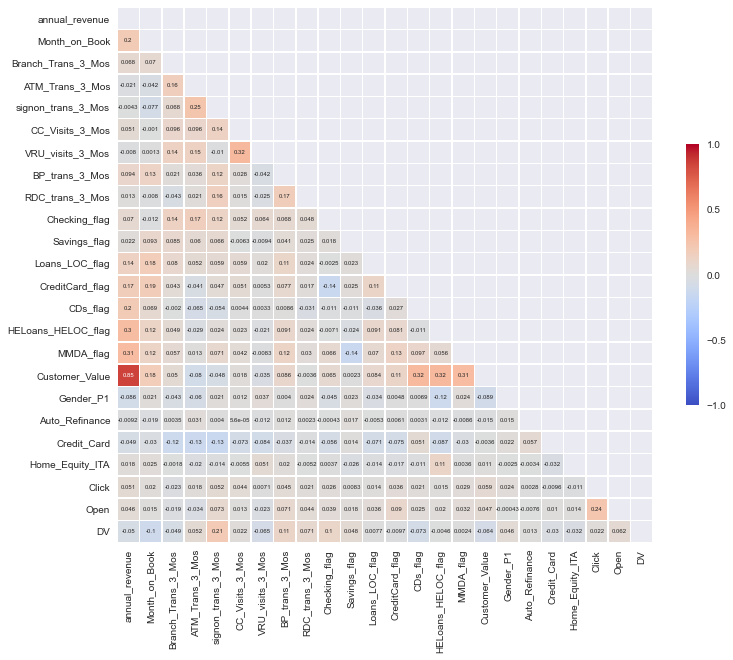

In [40]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))


heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 6})


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

plt.savefig('corr_plot.png')

# First Run of Logistic Regression Model

In [41]:
df.drop(columns='DV')

,annual_revenue,Month_on_Book,Branch_Trans_3_Mos,ATM_Trans_3_Mos,signon_trans_3_Mos,CC_Visits_3_Mos,VRU_visits_3_Mos,BP_trans_3_Mos,RDC_trans_3_Mos,Checking_flag,Savings_flag,Loans_LOC_flag,CreditCard_flag,CDs_flag,HELoans_HELOC_flag,MMDA_flag,Customer_Value,Gender_P1,Auto_Refinance,Credit_Card,Home_Equity_ITA,Click,Open
0,17,366,1,8,19,0,0,3,0,1,0,0,0,0,0,0,737,1,0,0,0,1,1
1,6400,350,6,0,0,0,1,0,0,1,0,0,0,1,0,0,300000,1,0,0,0,0,0
2,1127,299,2,10,28,0,0,0,0,1,1,0,1,0,0,0,41623,1,0,0,0,0,0
3,1247,317,4,37,20,0,2,0,0,1,0,0,1,0,0,0,8163,0,0,0,0,0,0
4,33,272,0,2,21,0,0,0,0,1,0,0,0,0,0,0,1187,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,9,29,5,9,141,1,1,0,0,1,0,0,0,0,0,0,525,0,0,0,0,0,0
4749,308,29,0,0,6,0,0,0,0,0,0,1,0,0,0,0,10865,1,0,0,0,0,0
4750,0,29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4142,0,0,1,0,0,0
4751,0,29,0,0,4,0,0,0,0,0,0,1,0,0,0,0,24247,0,0,1,0,0,0


In [42]:
# get independent variables
X = df.drop(columns='DV')
# to get intercept -- this is optional
# X = sm.add_constant(X)
# get response variables
Y = df[['DV']]
# fit the model with maximum likelihood function
model = sm.Logit(endog=Y, exog=X).fit()
# output message
# Optimization terminated successfully.
#          Current function value: 0.147065
#          Iterations 10

print(model.summary())
# output

         Current function value: 0.200755
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                     DV   No. Observations:                 4753
Model:                          Logit   Df Residuals:                     4730
Method:                           MLE   Df Model:                           22
Date:                Sun, 18 Apr 2021   Pseudo R-squ.:                  0.4384
Time:                        14:02:19   Log-Likelihood:                -954.19
converged:                      False   LL-Null:                       -1698.9
Covariance Type:            nonrobust   LLR p-value:                5.295e-302
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
annual_revenue        -0.0002      0.000     -1.526      0.127      -0.000    4.46e-05
Month_on_Book         -0.0013      0.000 

# END